# Automatic Machine Learning with H2O AutoML

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/h2o-autoML')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### Importing Packages

In [3]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Loading and Exploring the Data

In [4]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [5]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [6]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [7]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [8]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [9]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [10]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [11]:
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df = df.drop(['ID'], axis=1)

### Data Prep & Start H2O

In [13]:
%%capture

!pip install h2o

In [14]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1uue7_sn
  JVM stdout: /tmp/tmp1uue7_sn/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1uue7_sn/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.1
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_pooiv2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [15]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [17]:
train, test = h2o_df.split_frame(ratios=[.75])

# Identify predictors and response
x = train.columns
y = "TERM_DEPOSIT"
x.remove(y)

### Run H2O AutoML

In [18]:
from h2o.automl import H2OAutoML

In [19]:
aml = H2OAutoML(max_runtime_secs=600,
                #exclude_algos=['DeepLearning'],
                seed=1,
                #stopping_metric='logloss',
                #sort_metric='logloss',
                balance_classes=False,
                project_name='Completed'
)
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 25s, sys: 1.87 s, total: 1min 27s
Wall time: 10min 10s


### AutoML Leaderboard and Ensemble Exploration

In [20]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200816_185147,0.934687,0.216191,0.629735,0.167361,0.254931,0.0649898
XGBoost_grid__1_AutoML_20200816_185147_model_2,0.934445,0.199488,0.625881,0.165674,0.250294,0.0626471
StackedEnsemble_BestOfFamily_AutoML_20200816_185147,0.933482,0.217299,0.628269,0.161958,0.255522,0.0652913
GBM_grid__1_AutoML_20200816_185147_model_2,0.931434,0.205888,0.60886,0.159206,0.254189,0.0646121
XGBoost_grid__1_AutoML_20200816_185147_model_1,0.930092,0.205195,0.614968,0.164853,0.253847,0.0644383
GBM_grid__1_AutoML_20200816_185147_model_1,0.929863,0.207071,0.612499,0.169849,0.253338,0.0641804
XGBoost_3_AutoML_20200816_185147,0.929196,0.206532,0.613172,0.175328,0.253378,0.0642005
GBM_grid__1_AutoML_20200816_185147_model_3,0.928458,0.209768,0.602037,0.173231,0.253964,0.0644976
GBM_2_AutoML_20200816_185147,0.928165,0.21569,0.608978,0.188429,0.255328,0.0651923
GBM_5_AutoML_20200816_185147,0.928109,0.219884,0.599417,0.175475,0.257127,0.0661143


In [21]:
# Get the "All Models" Stacked Ensemble model
se = aml.leader

# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [22]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20200816_185147_model_2',
  0.41970893202488824,
  1.0,
  0.2660824982404211),
 ('XRT_1_AutoML_20200816_185147',
  0.28734641213755313,
  0.6846325875202337,
  0.18216874926418752),
 ('GBM_5_AutoML_20200816_185147',
  0.25972944839720324,
  0.6188323111069783,
  0.16466044733123827),
 ('DRF_1_AutoML_20200816_185147',
  0.20731860904456995,
  0.49395805813414567,
  0.13143359413432062),
 ('XGBoost_grid__1_AutoML_20200816_185147_model_1',
  0.19969341188779016,
  0.4757902361628763,
  0.12659945467661807),
 ('XGBoost_grid__1_AutoML_20200816_185147_model_3',
  0.07439146336502936,
  0.17724536622589207,
  0.04716188984692372),
 ('XGBoost_grid__1_AutoML_20200816_185147_model_4',
  0.07189230845804515,
  0.17129087082135774,
  0.045577502833924116),
 ('DeepLearning_grid__2_AutoML_20200816_185147_model_2',
  0.05687178665645655,
  0.1355029219465935,
  0.03605495599042638),
 ('XGBoost_3_AutoML_20200816_185147',
  0.00041154636350886845,
  0.0009805518351095378,
  0.

### Baselearner Model Exploration

In [24]:
#IMPORTANT: the model name is generated with timestamps, so use the output from
#           previous cell to change the model name accordingly 

model = h2o.get_model('XGBoost_grid__1_AutoML_20200816_185147_model_2')

In [25]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06251134594075285
RMSE: 0.2500226908517562
LogLoss: 0.20008973558860563
Mean Per-Class Error: 0.1330709487198275
AUC: 0.9303105171979507
AUCPR: 0.6122880586173518
Gini: 0.8606210343959013

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29123237187212164: 


,,no,yes,Error,Rate
0,no,9167.0,755.0,0.0761,(755.0/9922.0)
1,yes,359.0,923.0,0.28,(359.0/1282.0)
2,Total,9526.0,1678.0,0.0994,(1114.0/11204.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.291232,0.623649,211.0
1,max f2,0.140476,0.731643,276.0
2,max f0point5,0.366298,0.594292,182.0
3,max accuracy,0.568736,0.907890,112.0
4,max precision,0.949410,0.857143,4.0
5,max recall,0.000627,1.000000,398.0
6,max specificity,0.971531,0.999899,0.0
7,max absolute_mcc,0.241604,0.577386,232.0
8,max min_per_class_accuracy,0.140476,0.864275,276.0
9,max mean_per_class_accuracy,0.119918,0.866929,287.0



Gains/Lift Table: Avg response rate: 11.44 %, avg score: 11.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010086,0.864901,7.115320,7.115320,0.814159,0.908082,0.814159,0.908082,0.071763,0.071763,611.532037,611.532037,0.069646
1,2,0.020082,0.803535,6.632633,6.875049,0.758929,0.832998,0.786667,0.870707,0.066303,0.138066,563.263316,587.504940,0.133228
2,3,0.030079,0.748794,6.554602,6.768551,0.750000,0.776805,0.774481,0.839499,0.065523,0.203588,555.460218,576.855062,0.195928
3,4,0.040075,0.701346,5.228076,6.384290,0.598214,0.727533,0.730512,0.811570,0.052262,0.255850,422.807555,538.428958,0.243655
4,5,0.050071,0.645949,4.837921,6.075567,0.553571,0.671756,0.695187,0.783657,0.048362,0.304212,383.792066,507.556709,0.286978
5,6,0.100054,0.445224,4.447766,5.262392,0.508929,0.543336,0.602141,0.663604,0.222309,0.526521,344.776577,426.239248,0.481570
6,7,0.150036,0.289399,3.885943,4.803849,0.444643,0.362977,0.549673,0.563454,0.194228,0.720749,288.594272,380.384883,0.644454
7,8,0.200018,0.172333,2.262898,4.168895,0.258929,0.228816,0.477019,0.479832,0.113105,0.833853,126.289837,316.889468,0.715732
8,9,0.299982,0.062660,1.006600,3.115110,0.115179,0.105458,0.356442,0.355078,0.100624,0.934477,0.659962,211.510995,0.716477
9,10,0.400036,0.029088,0.413195,2.439330,0.047279,0.042799,0.279116,0.276973,0.041342,0.975819,-58.680474,143.932986,0.650179


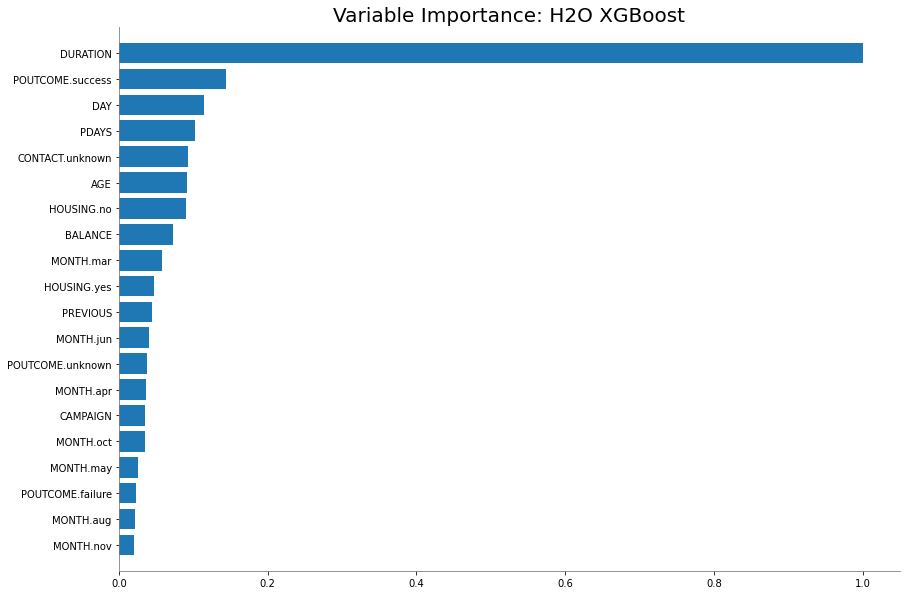

In [26]:
model.varimp_plot(num_of_features=20)

In [ ]:
model.partial_plot(train, cols=["DURATION"], figsize=(5,5));

In [ ]:
# save the model, change the path accordingly
model_path = h2o.save_model(model=model, path='/tmp', force=True)
print(model_path)